In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import probplot
from scipy.stats import zscore 

In [2]:
df=pd.read_csv("water_quality_classifier_mean_state.csv")

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten,Dropout
from tensorflow.keras.utils import to_categorical

# Charger les données
data = df

In [14]:

cols_to_drop=["WQI clf"]
# Diviser les données en caractéristiques et cibles
X =  data.drop(cols_to_drop, axis=1)
y = data["WQI clf"].values

In [15]:
# Encoder les labels catégoriels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Balancing the data by SMOTE - Oversampling of Minority level\n')
smt = SMOTE()
counter = Counter(y)
print('Before SMOTE', counter)
X,y = smt.fit_resample(X,y)
counter = Counter(y)
print('\nAfter SMOTE', counter)

Balancing the data by SMOTE - Oversampling of Minority level

Before SMOTE Counter({2: 593, 0: 479, 1: 308, 3: 284, 4: 15})

After SMOTE Counter({0: 593, 1: 593, 2: 593, 3: 593, 4: 593})


In [17]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Redimensionner les données pour les convolutions 1D
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
# Convertir les labels en one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Créer le modèle CNN
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(y_train.shape[1], activation="softmax"))

# Compiler le modèle
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Entraîner le modèle
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=64)
print(history.history['accuracy'])
print(history.history['loss'])

Epoch 1/150
38/38 [==============================] - 6s 46ms/step - loss: 18.1359 - accuracy: 0.2551 - val_loss: 5.8615 - val_accuracy: 0.2108
Epoch 2/150
38/38 [==============================] - 2s 42ms/step - loss: 3.3469 - accuracy: 0.2905 - val_loss: 2.8762 - val_accuracy: 0.3238
Epoch 3/150
38/38 [==============================] - 2s 58ms/step - loss: 2.6761 - accuracy: 0.3204 - val_loss: 2.5111 - val_accuracy: 0.3575
Epoch 4/150
38/38 [==============================] - 1s 22ms/step - loss: 2.0676 - accuracy: 0.3571 - val_loss: 1.6379 - val_accuracy: 0.3474
Epoch 5/150
38/38 [==============================] - 1s 18ms/step - loss: 1.5965 - accuracy: 0.3824 - val_loss: 1.4125 - val_accuracy: 0.3373
Epoch 6/150
38/38 [==============================] - 1s 21ms/step - loss: 1.3335 - accuracy: 0.4359 - val_loss: 1.2485 - val_accuracy: 0.4250
Epoch 7/150
38/38 [==============================] - 1s 20ms/step - loss: 1.2227 - accuracy: 0.4578 - val_loss: 1.2491 - val_accuracy: 0.4435
Epoch

In [21]:
# Évaluer le modèle sur les données de test
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

19/19 [==============================] - 0s 4ms/step - loss: 0.4091 - accuracy: 0.8567
Test loss: 0.4091041684150696
Test accuracy: 0.8566610217094421


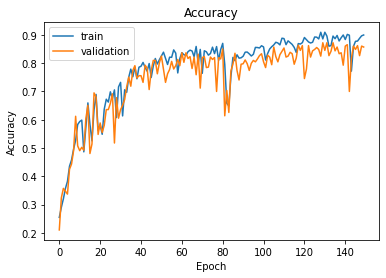

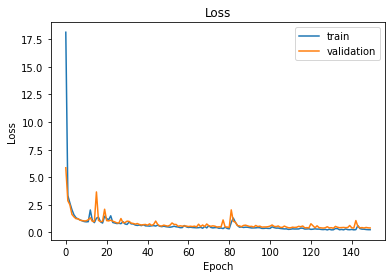

In [22]:
# Afficher les graphes d'accuracy et loss selon l'epoch
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()